### Load data set

In [1]:
# !mkdir datasets
# !kaggle datasets download START-UMD/gtd -p datasets

In [2]:
import zipfile
import os
import pandas as pd

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

ds_dir = 'datasets/'

In [3]:
# for file in os.listdir(ds_dir):
#     if file.endswith('.zip'):
#         with zipfile.ZipFile(f'{ds_dir}{file}', 'r') as f:
#             f.extractall(ds_dir)

# os.listdir(ds_dir)

In [4]:
def load_df(ds_path, **kwargs):
    if ds_path.endswith('.csv'):
        return pd.read_csv(ds_path, **kwargs)
    elif ds_path.endswith(('.xlsx', '.xls')):
        return pd.read_excel(ds_path, **kwargs)
    else:
        raise ValueError(f"Unsupported file type: {ds_path}")


In [5]:
file = [f for f in os.listdir(ds_dir) if f.endswith('.csv')][0]
file_path = ds_dir + file
file_path


'datasets/globalterrorismdb_0718dist.csv'

In [6]:
import chardet
import itertools

n = 10

with open(file_path, 'rb') as file:
    raw_data = b''.join(list(itertools.islice(file, n)))
    result = chardet.detect(raw_data)
    encoding = result['encoding']

print(f"Detected encoding: {encoding}")

Detected encoding: ISO-8859-1


In [7]:
df = load_df(file_path, encoding=encoding, low_memory=False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [8]:
# !pip install ydata-profiling

In [9]:
df.describe()


,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [10]:
df.describe(include='object')


,approxdate,resolution,country_txt,region_txt,provstate,city,location,summary,alternative_txt,attacktype1_txt,attacktype2_txt,attacktype3_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,targtype2_txt,targsubtype2_txt,corp2,target2,natlty2_txt,targtype3_txt,targsubtype3_txt,corp3,target3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,claimmode_txt,claimmode2_txt,claimmode3_txt,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,weaptype3_txt,weapsubtype3_txt,weaptype4_txt,weapsubtype4_txt,weapdetail,propextent_txt,propcomment,divert,kidhijcountry,ransomnote,hostkidoutcome_txt,addnotes,scite1,scite2,scite3,dbsource,related
count,9239,2220,181691,181691,181270,181256,55495,115562,29011,181691,6314,428,181691,171318,139139,181053,180132,11144,10685,10117,11020,10828,1176,1097,1026,1175,1147,181691,5890,2013,160,324,20,50561,19083,616,133,181691,160923,13127,11542,1863,1693,73,70,114021,64065,57959,324,3305,512,10991,28289,115500,76933,43516,181691,25038
unique,2244,1859,205,12,2855,36673,44109,112492,5,9,9,8,22,112,33237,86005,215,22,107,2691,5043,158,20,92,422,720,110,3537,1183,433,60,116,14,14490,10,9,8,12,30,11,28,10,22,5,16,19148,4,19157,143,217,386,7,15429,83988,62263,36090,26,14306
top,"September 18-24, 2016",8/4/1998,Iraq,Middle East & North Africa,Baghdad,Unknown,"The attack took place in Baghdad, Baghdad, Iraq.","09/00/2016: Sometime between September 18, 201...",Insurgency/Guerilla Action,Bombing/Explosion,Armed Assault,Facility/Infrastructure Attack,Private Citizens & Property,Unnamed Civilian/Unspecified,Unknown,Civilians,Iraq,Private Citizens & Property,Unnamed Civilian/Unspecified,Not Applicable,Civilians,Iraq,Private Citizens & Property,Unnamed Civilian/Unspecified,Not Applicable,Civilians,Iraq,Unknown,Militants,Al-Nusrah Front,The Family,Free Syrian Army,Jaysh al-Nukhba; Al-Izzah,Unknown,Personal claim,Unknown,Unknown,Explosives,Unknown Explosive Type,Firearms,Unknown Gun Type,Firearms,Unknown Gun Type,Firearms,Automatic or Semi-Automatic Rifle,Explosive,Minor (likely < $1 million),It is unknown if any property was damaged in t...,Unknown,Colombia,0,Unknown,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,"201612010023, 201612010024, 201612010025, 2016..."
freq,101,18,24636,50474,7645,9775,142,100,23410,88255,3434,229,43511,11596,16356,6461,24113,5585,3482,3309,2376,1786,554,325,312,200,139,82782,480,56,20,19,5,14889,5207,208,32,92426,44980,5283,2654,815,310,29,16,20925,43304,6966,27,687,36,3606,1607,205,134,139,78002,80


In [11]:
missing = df.isnull().sum()
for col, count in missing[missing > 0].items():
    print(f"{col}: {count} missing values")


approxdate: 172452 missing values
resolution: 179471 missing values
provstate: 421 missing values
city: 435 missing values
latitude: 4556 missing values
longitude: 4557 missing values
specificity: 6 missing values
location: 126196 missing values
summary: 66129 missing values
doubtterr: 1 missing values
alternative: 152680 missing values
alternative_txt: 152680 missing values
multiple: 1 missing values
attacktype2: 175377 missing values
attacktype2_txt: 175377 missing values
attacktype3: 181263 missing values
attacktype3_txt: 181263 missing values
targsubtype1: 10373 missing values
targsubtype1_txt: 10373 missing values
corp1: 42552 missing values
target1: 638 missing values
natlty1: 1559 missing values
natlty1_txt: 1559 missing values
targtype2: 170547 missing values
targtype2_txt: 170547 missing values
targsubtype2: 171006 missing values
targsubtype2_txt: 171006 missing values
corp2: 171574 missing values
target2: 170671 missing values
natlty2: 170863 missing values
natlty2_txt: 17086

In [12]:
df.imonth.value_counts(), df.iday.value_counts()

(imonth
 5     16875
 7     16268
 8     15800
 10    15563
 6     15359
 3     15257
 4     15152
 1     14936
 11    14906
 9     14180
 2     13879
 12    13496
 0        20
 Name: count, dtype: int64,
 iday
 15    6500
 1     6344
 4     6153
 16    6112
 10    6064
       ... 
 24    5752
 29    5507
 30    5046
 31    3095
 0      891
 Name: count, Length: 32, dtype: int64)

As i understand, dealing with missing values, standardizing data, and removing outliers is essential for machine learning tasks and not so inportant for data analysis. And it is even makes it more difficult to work with data and to find insights. Please correct me if i am wrong. 

We still need to process missing values in some cases but with caution.
I think that is case of missing values in iday and imonth (i.e. 0s) we should replace them with NaN so it won't skew some statistics.

As far as i ubderstand, normalizing data won't affect correlation between variables as it is just a linear transformation. However, we could later log transform data to make it more normal if needed.


In [13]:
from sklearn.preprocessing import StandardScaler

# Just to complete the task
scaler = StandardScaler()
df['nkill_stand'] = scaler.fit_transform(df.nkill.values.reshape(-1, 1))


In [14]:
import numpy as np

df.loc[df.imonth == 0, 'imonth'] = np.nan
df.loc[df.iday == 0, 'iday'] = np.nan

df.describe()


,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,nkill_stand
count,1.816910e+05,181691.000000,181671.000000,180800.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000,1.713780e+05
mean,2.002705e+11,2002.638997,6.467989,15.582058,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952,-4.840520e-18
std,1.325957e+09,13.259430,3.387810,8.768099,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325,1.000003e+00
min,1.970000e+11,1970.000000,1.000000,1.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_hist(df, col, **kwargs):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], kde=True, **kwargs)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



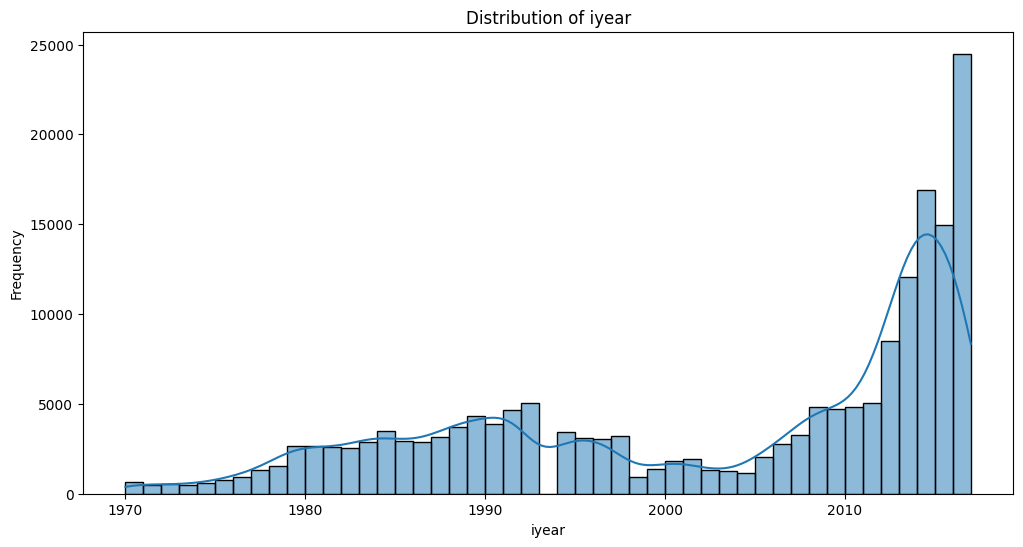

In [16]:
plot_hist(df, 'iyear', bins=len(df['iyear'].unique()))


We can observe steep rise in number of incidents after 2010 with preceding period of downward trend 
from early 1990s to mid 2000s.


In [18]:
# Use the property of logarithm to set any base
def log_base(x, base):
    return np.log(x) / np.log(base)

In [21]:
import plotly.express as px

# Fill nkill with 1 so it will be visible on the map
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="city",
                        hover_data=["country_txt", "iyear", "nkill"],
                        color='iyear', size=log_base(df.nkill.fillna(0) + 1, 2),
                        size_max=15, hight=600, width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.show()


TypeError: scatter_mapbox() got an unexpected keyword argument 'hight'